## 실습1

In [2]:
# 실습1 
import pandas as pd

fitness_1 = pd.read_csv("FITNESS_1.csv" , encoding = "euc-kr")
fitness_2 = pd.read_csv("FITNESS_2.csv", encoding = "euc-kr")


In [3]:
fitness_1.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT
0,Donna,여성,42,40대,68.15
1,Gracie,여성,38,30대,81.87
2,Luanne,여성,43,40대,85.84
3,Mimi,여성,50,50대,70.87
4,Chris,남성,49,40대,81.42


In [4]:
fitness_2.head()

,NAME,GENDER,AGE,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,59.571,8.17,166,40,172
1,Gracie,여성,38,60.055,8.63,170,48,186
2,Luanne,여성,43,54.297,8.65,156,45,168
3,Mimi,여성,50,54.625,8.92,146,48,155
4,Chris,남성,49,49.156,8.95,180,44,185


In [5]:
result_fitness = pd.merge(fitness_1, fitness_2 , on = ["NAME","GENDER", "AGE"])
result_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [6]:
fitness = pd.read_csv("FITNESS.csv" , encoding = "euc-kr")
fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


원본과 비교한 결과 같다.

## 실습2

In [7]:
fitness = pd.read_csv("FITNESS.csv" , encoding = "euc-kr")
fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [8]:
df = fitness.groupby(["AGEGROUP","GENDER"],as_index = False)[["WEIGHT"]].agg("mean")
df # AGEGROUP, GENDER를 칼럼으로 들어오게 하기 위해서 as_index = False로 넣어준다.

,AGEGROUP,GENDER,WEIGHT
0,30대,남성,81.080000
1,30대,여성,78.925000
2,40대,남성,85.465000
3,40대,여성,72.943750
4,50대,남성,79.426000
5,50대,여성,70.856667


In [9]:
df.pivot(index = "AGEGROUP", columns = "GENDER")

WEIGHT           
GENDER        남성         여성
AGEGROUP                   
30대       81.080  78.925000
40대       85.465  72.943750
50대       79.426  70.856667

# 실습3 타이타닉

In [10]:
#라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings

plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rc("axes" , unicode_minus = False)
%matplotlib inline
warnings.filterwarnings('ignore')

In [12]:
# 타이타닉 데이터 불러오기 

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 데이터특성 확인하기

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- PassengerId  891 non-null    int64  : 승객 id
- Survived     891 non-null    int64  : 생족여부 목표변수
- Pclass       891 non-null    int64  : 승객 등급 1,2,3 등석
- Name         891 non-null    object : 승객 이름
- Sex          891 non-null    object : 승객 성별
- Age          891 non-null    float64 : 승객 나이
- SibSp        891 non-null    int64  : 함께 탑승한 형제, 배우자의 수
- Parch        891 non-null    int64  : 함께 탑승한 자녀, 부모의 수
- Ticket       891 non-null    object : 티켓 아이디
- Fare         891 non-null    float64 : 티켓 요금
- Cabin        204 non-null    object :객실 번호
- Embarked     889 non-null    objec호 : 승객이 탑승한 곳 (C : Cherbourg , Q : Queenstown , S : Southampton )

In [16]:
df.shape

(891, 12)

In [14]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# 결측치 확인하기

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

객실 번호의 결측치는 "N"으로 대체하겠다.<br>
탑승지의 결측치는 최빈값으로 대체하겠다.

<Axes: xlabel='Sex', ylabel='Age'>

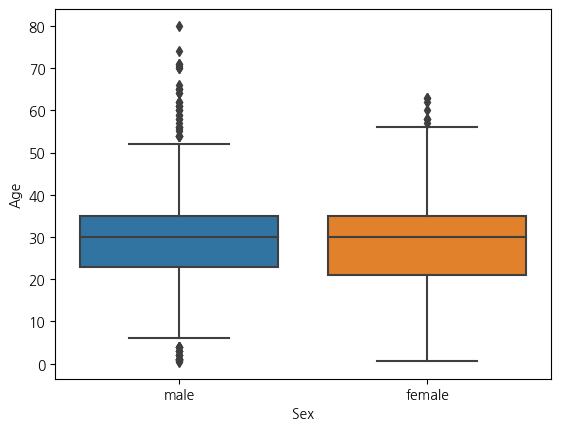

In [19]:
# 이상치 확인하기

sns.boxplot(data=df, x="Sex" , y= "Age")

<Axes: xlabel='Sex', ylabel='Fare'>

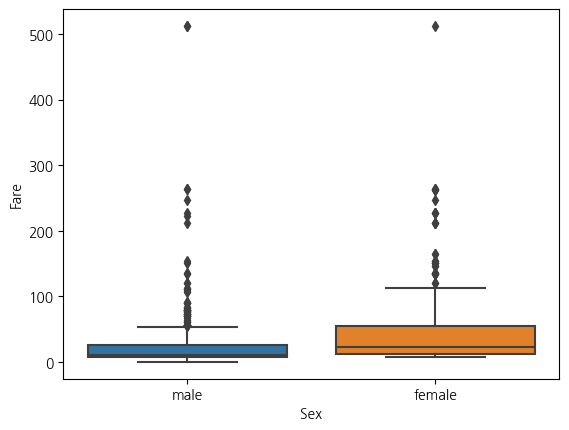

In [21]:
# 이상치 확인하기

sns.boxplot(data=df, x="Sex" , y= "Fare")

# 데이터 전처리


In [24]:
# 결측치 처리

df["Cabin"].fillna("N",inplace = True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [28]:
# 파생변수 생성

# 1. 객실번호 첫자리만 별도의 변수로 생성
df["Cabin"] = df["Cabin"].str.get(i=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [29]:
# 2. 나이에 대한 파생변수 생성

age_group = []
for i in df["Age"]:
    if i <= 14  : 
        age_group.append("Child")
    elif i <= 28:
        age_group.append("Young")
    elif i <= 45:
        age_group.append("Middle")
    elif i <= 56:
        age_group.append("Prime")
    else: 
        age_group.append("Old")
        

age_group

['Young',
 'Middle',
 'Young',
 'Middle',
 'Middle',
 'Middle',
 'Prime',
 'Child',
 'Young',
 'Child',
 'Child',
 'Old',
 'Young',
 'Middle',
 'Child',
 'Prime',
 'Child',
 'Middle',
 'Middle',
 'Middle',
 'Middle',
 'Middle',
 'Young',
 'Young',
 'Child',
 'Middle',
 'Middle',
 'Young',
 'Middle',
 'Middle',
 'Middle',
 'Middle',
 'Middle',
 'Old',
 'Young',
 'Middle',
 'Middle',
 'Young',
 'Young',
 'Child',
 'Middle',
 'Young',
 'Middle',
 'Child',
 'Young',
 'Middle',
 'Middle',
 'Middle',
 'Middle',
 'Young',
 'Child',
 'Young',
 'Prime',
 'Middle',
 'Old',
 'Middle',
 'Young',
 'Middle',
 'Child',
 'Child',
 'Young',
 'Middle',
 'Middle',
 'Child',
 'Middle',
 'Middle',
 'Middle',
 'Young',
 'Young',
 'Young',
 'Middle',
 'Young',
 'Young',
 'Young',
 'Middle',
 'Young',
 'Middle',
 'Middle',
 'Child',
 'Middle',
 'Young',
 'Middle',
 'Middle',
 'Young',
 'Young',
 'Middle',
 'Young',
 'Middle',
 'Young',
 'Young',
 'Middle',
 'Young',
 'Prime',
 'Young',
 'Old',
 'Middle',
 'Ol

In [31]:
df["AgeGroup"] = age_group
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Middle
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,N,Q,Middle
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,Prime
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,N,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,N,S,Young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,N,C,Child


In [32]:
# 가족수 파생변수 추가

df["Family"] = df["Parch"] + df["SibSp"]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Young,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Middle,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Middle,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Middle,0


In [33]:
# 요금 구간화

fare = []
for i in df["Fare"]:
    if i <= 50:
        fare.append(0)
    elif i <= 100:
        fare.append(1)
    elif i <= 150:
        fare.append(2)
    elif i <= 200:
        fare.append(3)
    else:
        fare.append(4)
        
df["Fare"] = fare
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,N,S,Young,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,1,C,C,Middle,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0,N,S,Young,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,1,C,S,Middle,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0,N,S,Middle,0


# 그래프분석

Text(0.5, 1.0, '남여간 나이 분포')

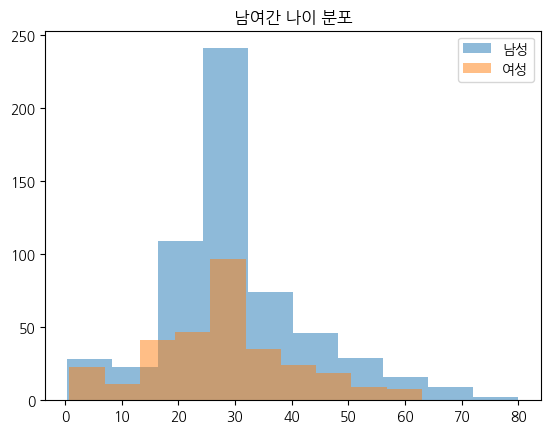

In [103]:
plt.hist(df["Age"][df["Sex"] == "male"], label = "남성", bins = 10 , alpha = 0.5)
plt.hist(df["Age"][df["Sex"] == "female"], label = "여성", bins = 10 , alpha =0.5)
plt.legend()
plt.title('남여간 나이 분포')

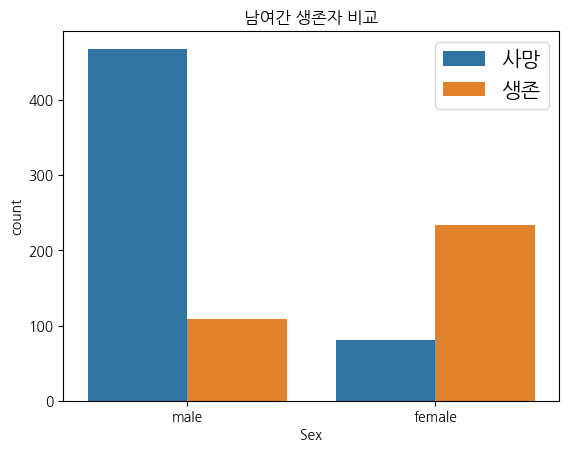

In [87]:
sns.countplot(x = "Sex", data = df , hue = "Survived" )
plt.title("남여간 생존자 비교")
plt.legend( ('사망', '생존'), fontsize=15)

생존한 사람의 비율을 살펴보면 남자보다 여자의 생존율이 더 높은것을 확인할 수 있다.
이때 남자보다 여자를 우선순위로 구조를 하였기 때문으로 보인다.

In [47]:
df_sur = df.groupby(["Survived"]).size()

Text(0.5, 1.0, '생존자 비율')

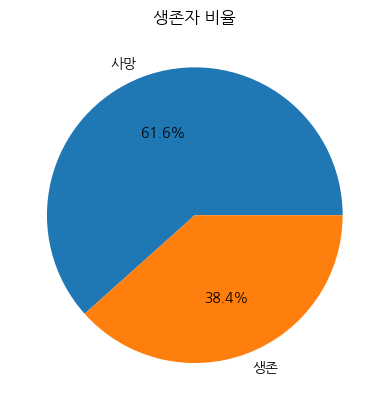

In [73]:
labels = ["사망", "생존"]
df_sur.plot.pie(y = "Survived",labels = labels ,autopct = "%.1f%%")
plt.title("생존자 비율")

Text(0.5, 1.0, '성별 비율')

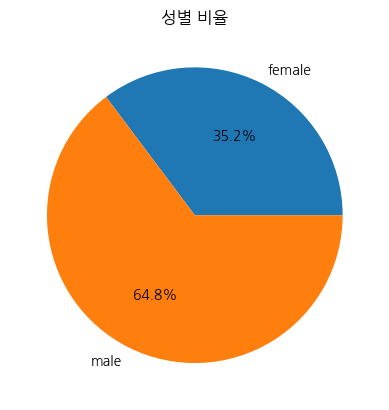

In [58]:
# 성별에 대한 비율

df_sex = df.groupby(["Sex"]).size()
df_sex.plot.pie(y = "Sex",autopct = "%.1f%%")
plt.title("성별 비율")

Text(0.5, 1.0, '승객등급 비율')

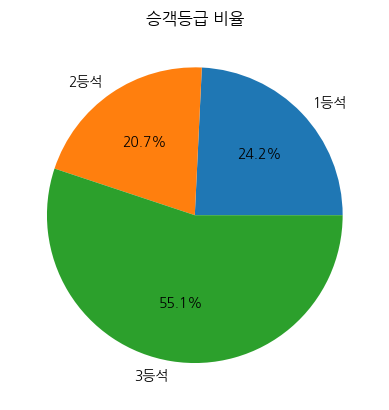

In [62]:
# 승객등급에 대한 비율

df_Pclass = df.groupby(["Pclass"]).size()
labels = ["1등석", "2등석" , "3등석"]
df_Pclass.plot.pie(y = "Pclass", labels = labels, autopct = "%.1f%%")
plt.title("승객등급 비율")

Text(0.5, 1.0, '승객등급에 대한 생존자 비교')

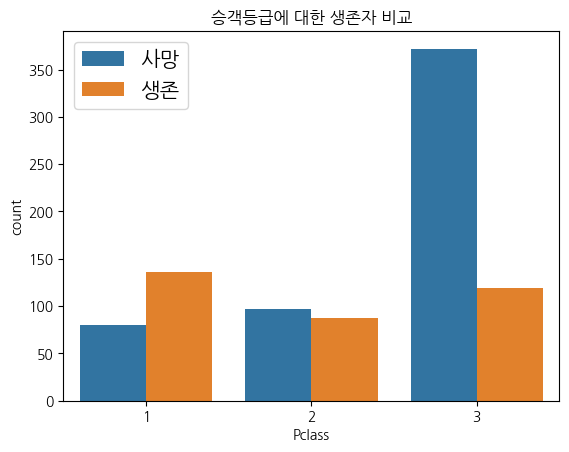

In [93]:
sns.countplot(x = "Pclass", data = df ,  hue = "Survived")
plt.legend( ('사망', '생존'), fontsize=15)
plt.title("승객등급에 대한 생존자 비교")

승객 등급에 따라 생존율이 다른 것을 확인 할 수 있다. <br>
승객 등급이 높을수록 생존율이 더 높은 것을 확인 할 수 있다. <br>
그 이유는 한정된 구명조끼를 1등급 사람에게 먼저 준 것이 아닐까? 생각해볼 수 있다. <br>
또한 승객등급이 높을수록 방의 위치가 좋아서 생존율이 높은게 아닐까? 생각해볼 수 있다.

Text(0.5, 1.0, '탑승지에 대한 비율')

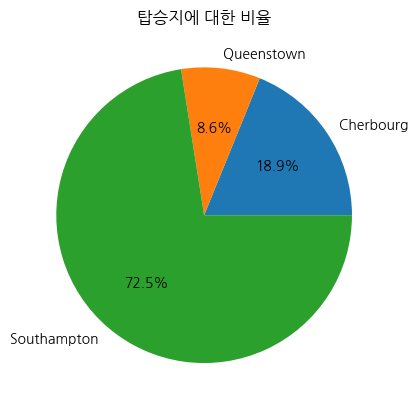

In [68]:
# 탑승지에 대한 비율

df_Embarked = df.groupby(["Embarked"]).size()
labels = ["Cherbourg", "Queenstown" , "Southampton"]
df_Embarked.plot.pie(y = "Embarked", labels = labels  ,autopct = "%.1f%%")
plt.title("탑승지에 대한 비율")

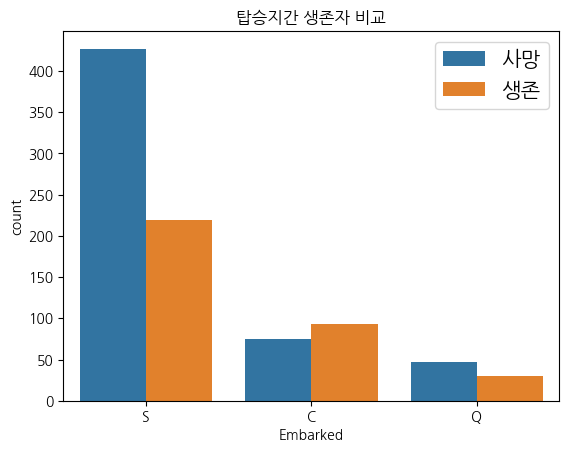

In [84]:
labels = ["사망" ,"생존"]
sns.countplot(x = "Embarked", data = df ,  hue = "Survived")
plt.title("탑승지간 생존자 비교")
plt.legend( ('사망', '생존'), fontsize=15)


S 탑승자가 제일 많았으며 제일 많이 사망자가 나온 곳도 S 이다.


Text(0.5, 1.0, '연령대별 생존자 비교')

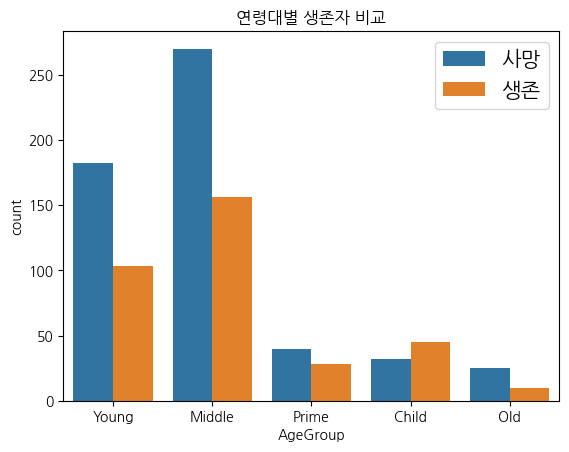

In [83]:
sns.countplot(x = "AgeGroup", data = df ,  hue = "Survived")
plt.legend( ('사망', '생존'), fontsize=15)
plt.title("연령대별 생존자 비교")

연령대별 생존자를 봤을 때 생존자 비율이 가장 구간은 Child인 것을 확인할 수 있다. <br>
그 이유를 생각해보면 위급상황에 여자와 아이먼저 구출하자는 선장의 지시가 있었지 않았을까? 짐작해볼 수 있다.

<Axes: >

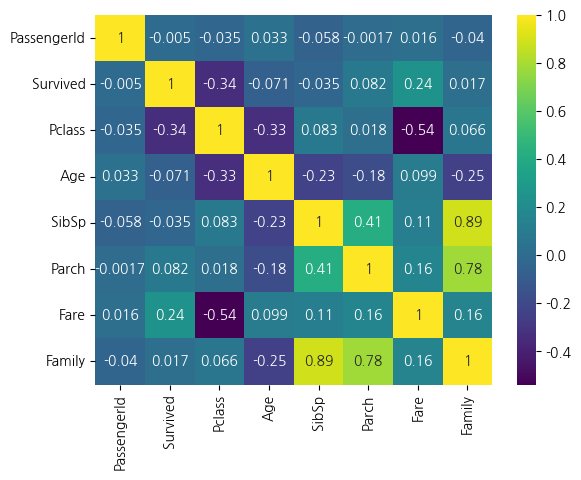

In [104]:
df_corr = df.corr()
sns.heatmap(df_corr, annot = True , cmap = "viridis")

상관계수가 0.6정도 되면 높은 상관관계에 있다고 볼 수 있는데, 반응변수와 의미있는 상관관계를 가지는 변수는 찾아볼 수 없다.

# 결론

타이타닉호의생존자는 아이와 여자의 비율이 높았고, 그 이유는 선장이 여자와 아이를 우선적으로 구출한 것으로 추측을 해볼 수 있다. <br>
또한 승객의 등급이 높을수록 생존율이 높았는데, 그 이유는 등급이 높을수록 방의 위치가 생존하기 더 좋은 위치였지 않았나 추측해 볼 수 있다.<br>
또한 한정된 구명조끼는 승객의 등급이 높은 사람을 우선적으로 준게 아닌가 생각해 볼 수 있다. <br>
탑승한 위치에 따라서도 생존 비율이 달랐는데, 그 이유는 방의 위치를 선정할 때 승객의 등급이 같다면 탑승 위치에 따라 구분하여 방을 줘서 이런 결과가 나오지 않았을까 한다.